In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [19]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# Data is Clear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df["Geography"].unique() # Three countries 

array(['France', 'Spain', 'Germany'], dtype=object)

In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
#delete unneeded columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
labelencoder=LabelEncoder()
les={}
df['Gender']=labelencoder.fit_transform(df['Gender'])
les['Gender']=labelencoder
labelencoder=LabelEncoder()
df['Geography']=labelencoder.fit_transform(df['Geography'])
les['Geography']=labelencoder

In [25]:
# Data Is Ready Now
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
x=df.drop(columns='Exited') # droping coulmn from the feature 
y=df['Exited']
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [28]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
y_pred = model.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.23%


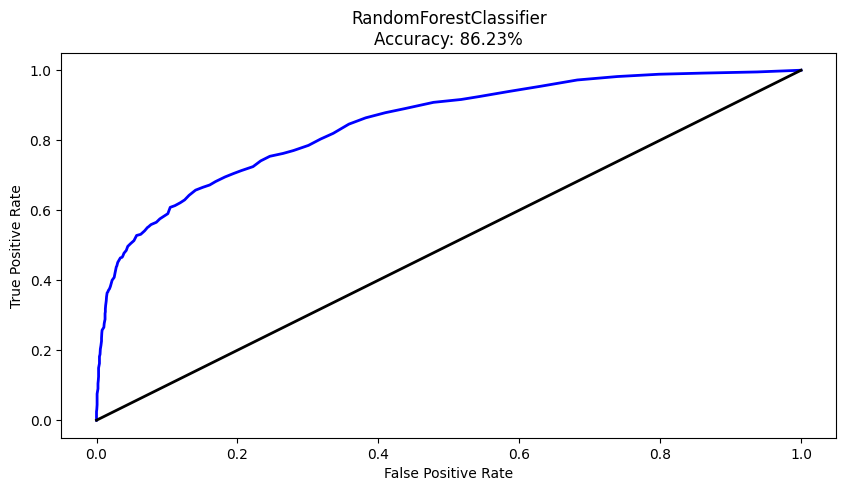

In [31]:
# visualization 
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

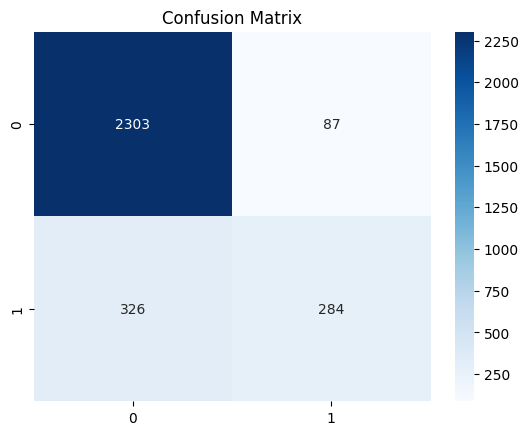

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

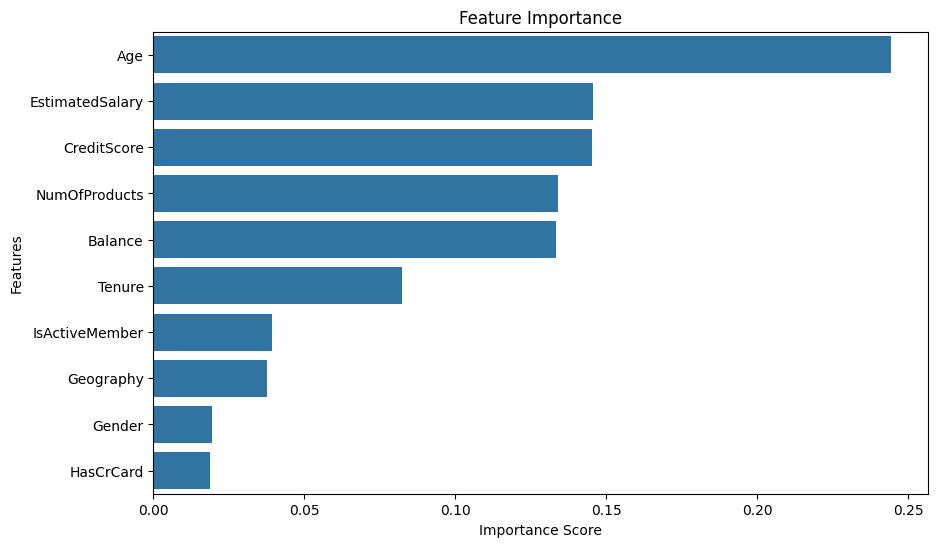


Top Features Influencing Churn:

Age                0.244493
EstimatedSalary    0.145660
CreditScore        0.145286
NumOfProducts      0.134046
Balance            0.133509
Tenure             0.082318
IsActiveMember     0.039197
Geography          0.037588
Gender             0.019292
HasCrCard          0.018611
dtype: float64


In [34]:
#Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\nTop Features Influencing Churn:\n")
print(feature_importances)

### Loading the Saved Model and Predicting Output

In [37]:
import joblib

# Save the trained model
joblib.dump(model, 'customer_churn_model.pkl')

# Save the encoders
joblib.dump(les, 'label_encoders.pkl')

print("Saving Successful")

Saving Successful


In [42]:
def predict_customer_churn(input_data):
    # Load the saved items
    loaded_model = joblib.load('customer_churn_model.pkl')
    loaded_les = joblib.load('label_encoders.pkl')
    
    # Input feature order
    feature_names = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
                     'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
    
    # Create DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_names)
    
    # Encode 'Gender' and 'Geography'
    input_df['Gender'] = loaded_les['Gender'].transform([input_df.loc[0, 'Gender']])[0]
    input_df['Geography'] = loaded_les['Geography'].transform([input_df.loc[0, 'Geography']])[0]
        
    # Predict
    prediction = loaded_model.predict(input_df)
    
    if prediction[0] == 1:
        print("The customer is likely to churn.")
    else:
        print("The customer is likely to stay.")


In [56]:
# Example input as readable text (before encoding)

example_input = {
    'CreditScore': 600,
    'Geography': 'France',   # as text
    'Gender': 'Male',        # as text
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000.0,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000.0
}

predict_customer_churn(example_input)


The customer is likely to stay.
